#### FastAI and UNet
- Reference: https://www.youtube.com/watch?v=DKzL4zumFi8
- https://walkwithfastai.com/Segmentation

In [1]:
import os
import numpy as np
from pathlib import Path

from fastai.vision.all import *

cwd = Path.cwd()
path = os.path.join(cwd.parent, "training_images")

In [2]:
codes = np.loadtxt(os.path.join(path, "codes.txt"), dtype='str')
codes

array(['background', 'tags', 'ruler', 'lepidopteran'], dtype='<U12')

In [3]:
files = get_image_files(os.path.join(path, "images"))
print("Total Images:", len(files), " \t Sample: ", files[0])

Total Images: 8  	 Sample:  /home/rahul/workspace/vision/eeb/training_images/images/IMG_1763.JPG


In [4]:
def label_func(image):
    """Function used to label images while training. Required by fastai."""
    return os.path.join(path, "labels", f"{image.stem}.png")

<Axes: >

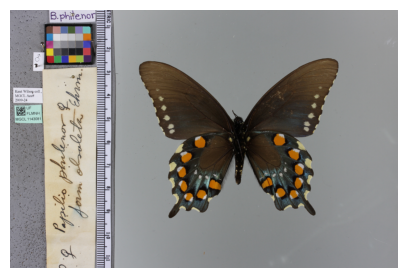

In [5]:
img = PILImage.create(files[1])
img.show(figsize=(5,5))

<Axes: >

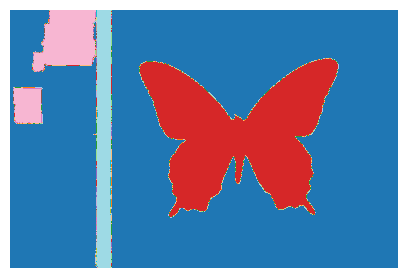

In [6]:
msk = PILMask.create(label_func(files[1]))
msk.show(figsize=(5,5), alpha=1)

In [7]:
print("Unique labels:",np.unique(msk))
tensor(msk)

Unique labels: [0 1 2 3]


tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [8]:
name2id = {v:k for k,v in enumerate(codes)}
name2id

{'background': 0, 'tags': 1, 'ruler': 2, 'lepidopteran': 3}

In [9]:
dls = SegmentationDataLoaders.from_label_func(path, bs=1, fnames=files, label_func=label_func, codes=codes)

/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


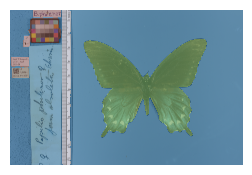

In [10]:
dls.show_batch()

In [11]:
# Now, loading the model 
learn = unet_learner(dls, resnet50, pretrained=True) # weights="./init/segmentation_test-4classes.pkl"

In [12]:
# Train for 6 epochs
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,2.858736,1.011837,42:04


epoch,train_loss,valid_loss,time
0,0.544518,0.996298,43:05
1,0.364679,0.450622,43:22
2,0.274318,0.126829,42:58
3,0.216512,0.128356,43:08
4,0.177012,0.071790,43:20
5,0.146997,0.052511,43:38
6,0.122027,0.031353,44:14
7,0.102311,0.023452,44:33


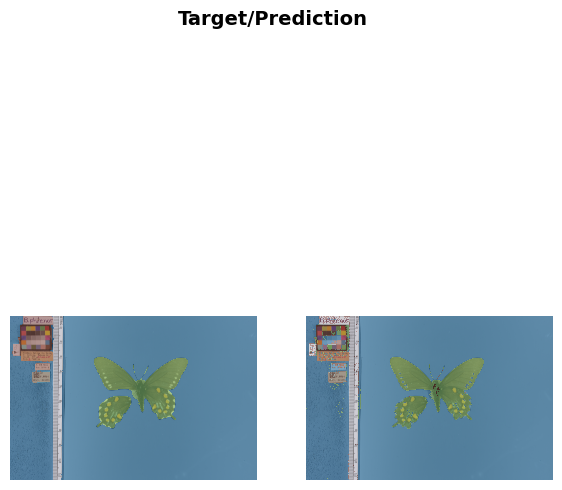

In [ ]:
learn.show_results(max_n=4, figsize=(7,8))

In [ ]:
# Model save
learn.save('battus10_segmentation_test-4classes-resnet50-b1-e10')
# learn.load('battus10_segmentation_test-4classes');

Path('/home/rahul/workspace/vision/eeb/training_images/models/battus10_segmentation_test-4classes-resnet34-b2-e10.pth')